# Decision Trees on Diabetes Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import random
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

### Building a regression tree

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_x = diabetes.data
diabetes_y = diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_x, 
                                                    diabetes_y, 
                                                    test_size=0.2, 
                                                    random_state = 1412)

In [5]:
params = {'max_leaf_nodes': list(range(2, 100)),
          'max_depth': list(range(2, 7)),
          'min_samples_leaf': list(range(5, 100, 5))}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=1412), 
                              params, 
                              verbose=1, 
                              cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9310 candidates, totalling 27930 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1412),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95]},
             verbose=1)

In [6]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=6, min_samples_leaf=20,
                      random_state=1412)

In [7]:
y_pred = grid_search_cv.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))

Test MSE: 3777.069190532292


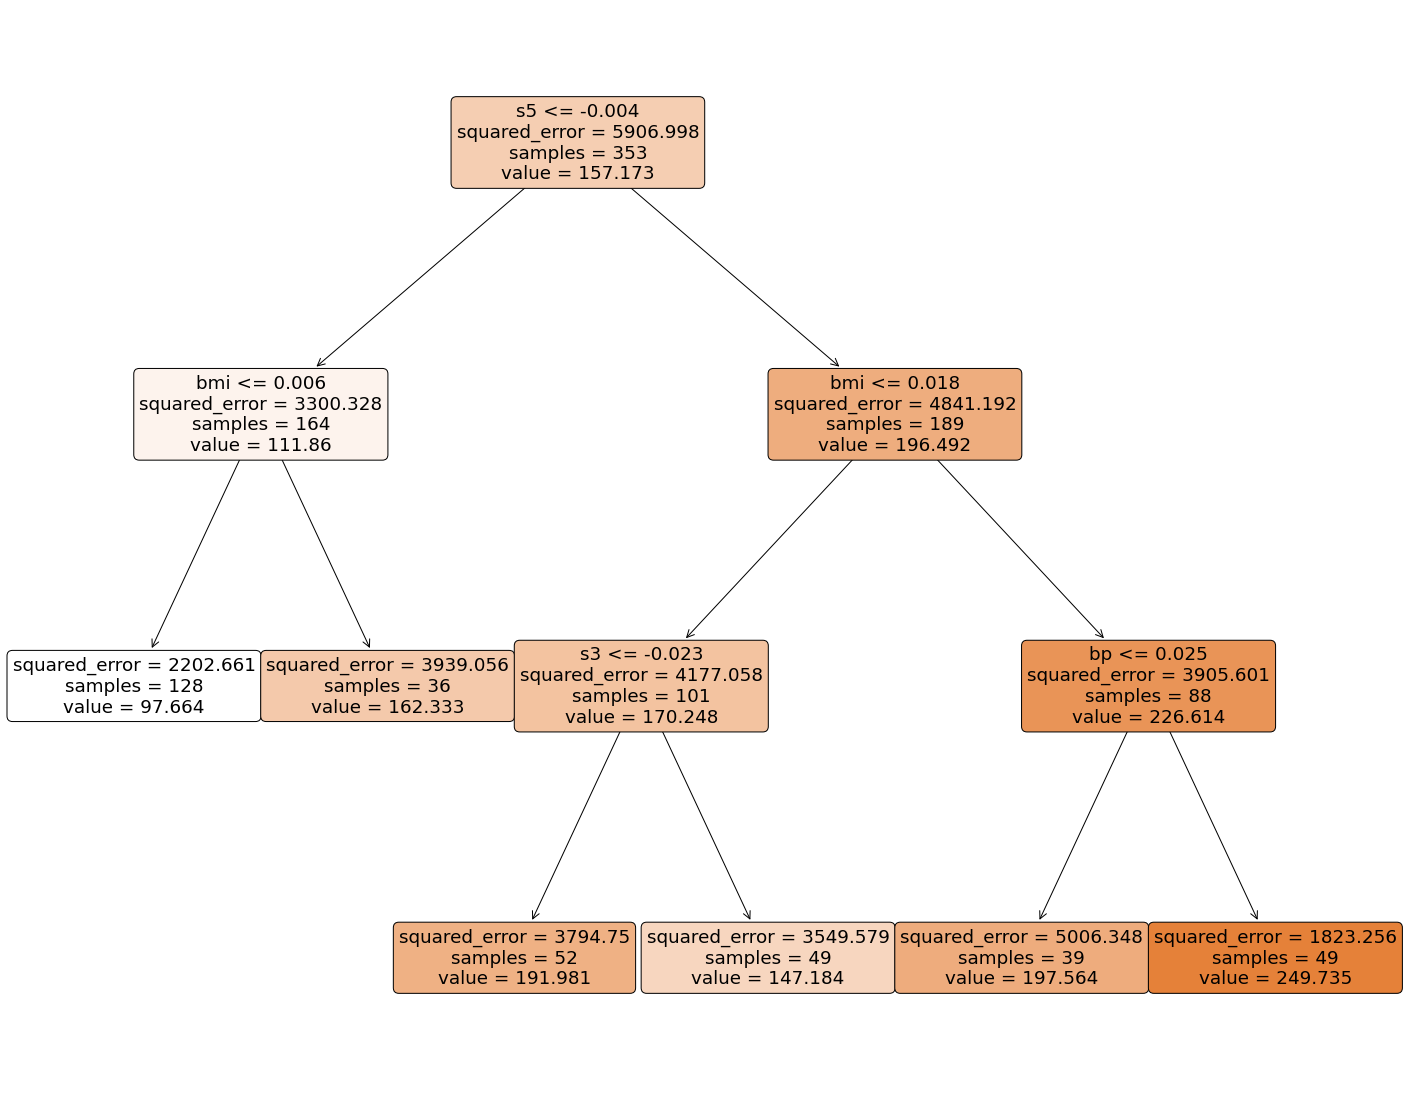

In [8]:
plt.figure(figsize=(25,20))
plot_tree(grid_search_cv.best_estimator_, 
          rounded=True,
          filled=True,
          feature_names=diabetes.feature_names)
plt.show()